Redes Neuronales Recurrentes y Prophet para Predicción de Series Temporales (Core)
Descripción:

En este ejercicio, implementarás una red neuronal recurrente (RNN) utilizando LSTM para predecir valores futuros en una serie temporal. Además, se te pide que explores el uso de la herramienta Prophet, un modelo de predicción de series temporales desarrollado por Facebook, y compares los resultados obtenidos con los de la RNN.



Objetivo:

El objetivo es predecir los valores futuros de una serie temporal utilizando redes recurrentes y comparar su rendimiento con Prophet. Este ejercicio te permitirá explorar dos enfoques distintos para la predicción de series temporales.



Instrucciones:



1. Selección del dataset:
  - Utiliza un dataset de series temporales de Kaggle, como el de «Air Quality Prediction» o cualquier otro relacionado con predicción de demanda, precios de acciones, etc. Puedes elegir el dataset que más se relacione con tus intereses.
  - Enlace sugerido: [Air Quality Prediction](https://www.kaggle.com/competitions/air-quality-prediction)


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#importar dataset
df = pd.read_csv('c:/Users/diego/Documents/repositorios/Proyecto_2/datasets/gold_financial_regression.csv')
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [50]:
# Convertir la columna de fecha a datetime
df["date"] = pd.to_datetime(df["date"])

# Ordenar por fecha
data = df.sort_values("date")

# Verificar valores faltantes
print(data.isnull().sum())

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

In [51]:
# Vamos a eliminar las columnas que no son relevantes o tienen demasiados valores faltantes.
# Eliminar columnas con muchos valores faltantes
columns_to_drop = ["us_rates_%", "CPI", "GDP", "eur_usd"]
data = data.drop(columns=columns_to_drop)

In [52]:
# Imputar valores faltantes usando interpolación lineal
data = data.ffill()

# Verificar si quedan valores faltantes
print(data.isnull().sum())

date                  0
sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
usd_chf               0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-low    0
gold open             0
gold high             0
gold low              0
gold close      

In [53]:
# Seleccionar columnas relevantes
gold_data = data[["date", "gold close"]]

# Renombrar columnas
gold_data.columns = ["Date", "Gold_Close"]

# Convertir la columna de fecha a datetime
gold_data["Date"] = pd.to_datetime(gold_data["Date"])

# Ordenar por fecha
gold_data = gold_data.sort_values("Date")

# Mostrar las primeras filas
print(gold_data.head())

        Date  Gold_Close
0 2010-01-14      112.03
1 2010-01-15      110.86
2 2010-01-18      110.86
3 2010-01-19      111.52
4 2010-01-20      108.94


C:\Users\diego\AppData\Local\Temp\ipykernel_7280\3486248345.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data["Date"] = pd.to_datetime(gold_data["Date"])



2. Preprocesamiento de datos:
  - Realiza una exploración inicial de la serie temporal, incluyendo la visualización de la tendencia y la estacionalidad si es aplicable.
  - Realiza un escalado de los datos, ya que las redes neuronales recurrentes se benefician de que los datos estén en un rango similar.


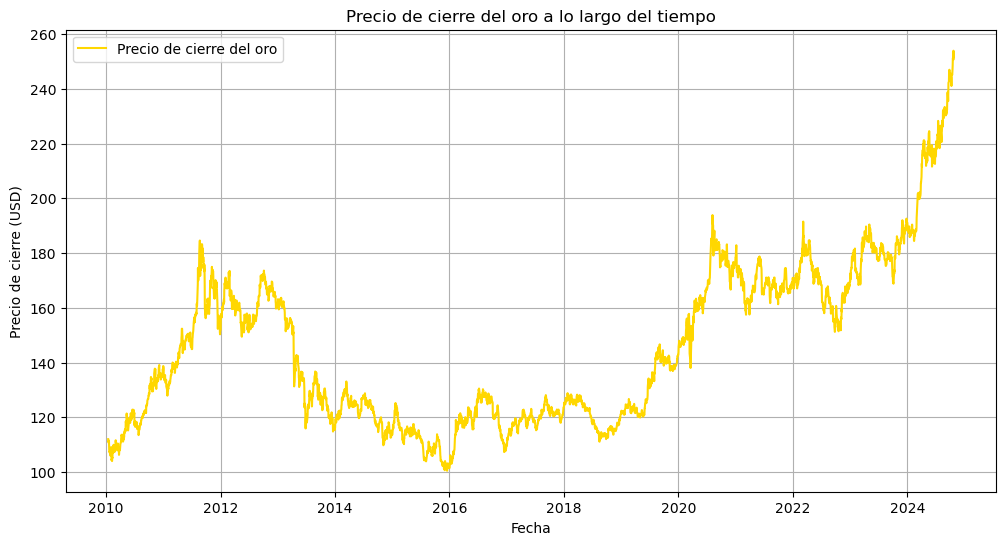

In [54]:
import matplotlib.pyplot as plt

# Graficar la serie temporal del precio del oro
plt.figure(figsize=(12, 6))
plt.plot(gold_data["Date"], gold_data["Gold_Close"], label="Precio de cierre del oro", color="gold")
plt.title("Precio de cierre del oro a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.legend()
plt.grid()
plt.show()

In [55]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
train_size = int(len(gold_data) * 0.8)
train_data = gold_data[:train_size]
test_data = gold_data[train_size:]

print(f"Tamaño del conjunto de entrenamiento: {len(train_data)}")
print(f"Tamaño del conjunto de prueba: {len(test_data)}")

Tamaño del conjunto de entrenamiento: 3123
Tamaño del conjunto de prueba: 781


In [56]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data[["Gold_Close"]])
scaled_test_data = scaler.transform(test_data[["Gold_Close"]])

# Función para crear secuencias
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Crear secuencias
seq_length = 60  # Usar 60 días históricos para predecir el siguiente día
X_train, y_train = create_sequences(scaled_train_data, seq_length)
X_test, y_test = create_sequences(scaled_test_data, seq_length)


3. Implementación de RNN con LSTM:
  - Implementa una red LSTM para predecir la serie temporal. Utiliza una arquitectura simple con una capa LSTM y una capa densa para predecir el valor futuro de la serie temporal.
  - Asegúrate de dividir los datos en conjuntos de entrenamiento y prueba, utilizando las primeras partes de la serie para entrenar el modelo y las últimas partes para probar la precisión de las predicciones.


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer="adam", loss="mean_squared_error")

# Resumen del modelo
model.summary()

c:\Users\diego\miniconda3\envs\deep_learning\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0154 - val_loss: 0.0078
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 8.5297e-04 - val_loss: 0.0041
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.3037e-04 - val_loss: 0.0032
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 6.9804e-04 - val_loss: 0.0031
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.5846e-04 - val_loss: 0.0013
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.0267e-04 - val_loss: 0.0018
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.1974e-04 - val_loss: 7.8422e-04
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.2643e-04 - val_loss: 9.2572e-04
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.2176e-04 - val_loss: 7.9153e-04
Epoch 12/20
96/96 ━

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


C:\Users\diego\AppData\Local\Temp\ipykernel_7280\719762933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predictions"] = np.nan


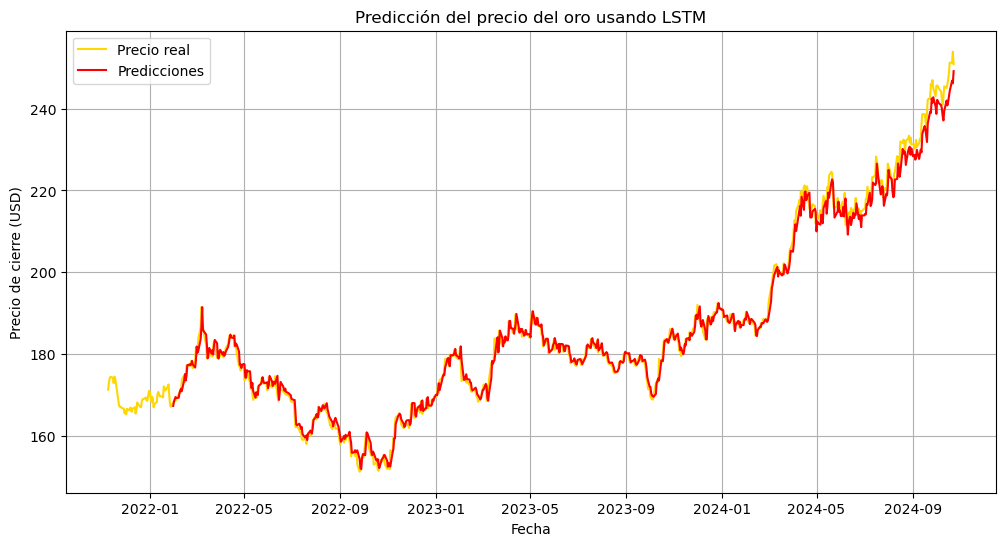

In [59]:
# Hacer predicciones
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Revertir la escala

# Comparar predicciones con valores reales
test_data["Predictions"] = np.nan
test_data.iloc[seq_length:, test_data.columns.get_loc("Predictions")] = predictions.flatten()

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(test_data["Date"], test_data["Gold_Close"], label="Precio real", color="gold")
plt.plot(test_data["Date"], test_data["Predictions"], label="Predicciones", color="red")
plt.title("Predicción del precio del oro usando LSTM")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.legend()
plt.grid()
plt.show()


4. Uso de Prophet:
  - Instala y utiliza Prophet para predecir la misma serie temporal. Prophet es un modelo que maneja fácilmente tendencias y estacionalidades, por lo que es ideal para comparación con redes recurrentes.
  - Entrena Prophet con los mismos datos que utilizaste para la red LSTM y realiza predicciones en el conjunto de prueba.


In [60]:
# Preparar los datos para Prophet
prophet_data = gold_data.reset_index()  # Reiniciar el índice para tener la columna de fecha
prophet_data = prophet_data.rename(columns={"Date": "ds", "Gold_Close": "y"})

# Mostrar las primeras filas
print(prophet_data.head())

   index         ds       y
0      0 2010-01-14  112.03
1      1 2010-01-15  110.86
2      2 2010-01-18  110.86
3      3 2010-01-19  111.52
4      4 2010-01-20  108.94


In [61]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (80%) y prueba (20%)
train_data, test_data = train_test_split(prophet_data, test_size=0.2, shuffle=False)

# Mostrar los tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {len(train_data)}")
print(f"Tamaño del conjunto de prueba: {len(test_data)}")

Tamaño del conjunto de entrenamiento: 3123
Tamaño del conjunto de prueba: 781


In [62]:
from prophet import Prophet

# Crear y entrenar el modelo Prophet
model_prophet = Prophet()
model_prophet.fit(prophet_data)

02:49:32 - cmdstanpy - INFO - Chain [1] start processing
02:49:33 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
# Crear un DataFrame con las fechas del conjunto de prueba
future = pd.DataFrame({"ds": test_data["ds"]})

# Realizar predicciones
forecast = model_prophet.predict(future)

# Mostrar las predicciones
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head())

          ds        yhat  yhat_lower  yhat_upper
0 2021-11-09  156.093004  146.684788  165.875907
1 2021-11-10  155.984660  145.305352  165.599685
2 2021-11-11  155.924769  145.605702  165.650054
3 2021-11-12  155.965091  145.988361  165.985753
4 2021-11-15  155.806235  146.468258  166.437875


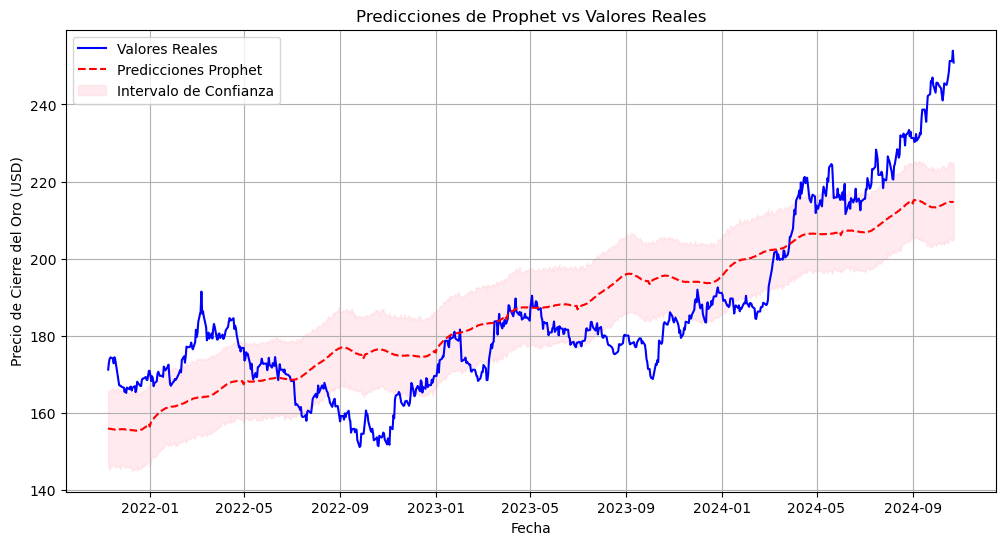

In [64]:
import matplotlib.pyplot as plt

# Graficar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(test_data["ds"], test_data["y"], label="Valores Reales", color="blue")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicciones Prophet", color="red", linestyle="--")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color="pink", alpha=0.3, label="Intervalo de Confianza")
plt.title("Predicciones de Prophet vs Valores Reales")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre del Oro (USD)")
plt.legend()
plt.grid()
plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular métricas
mae = mean_absolute_error(test_data["y"], forecast["yhat"])
mse = mean_squared_error(test_data["y"], forecast["yhat"])

print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

Error Absoluto Medio (MAE): 11.23
Error Cuadrático Medio (MSE): 174.17


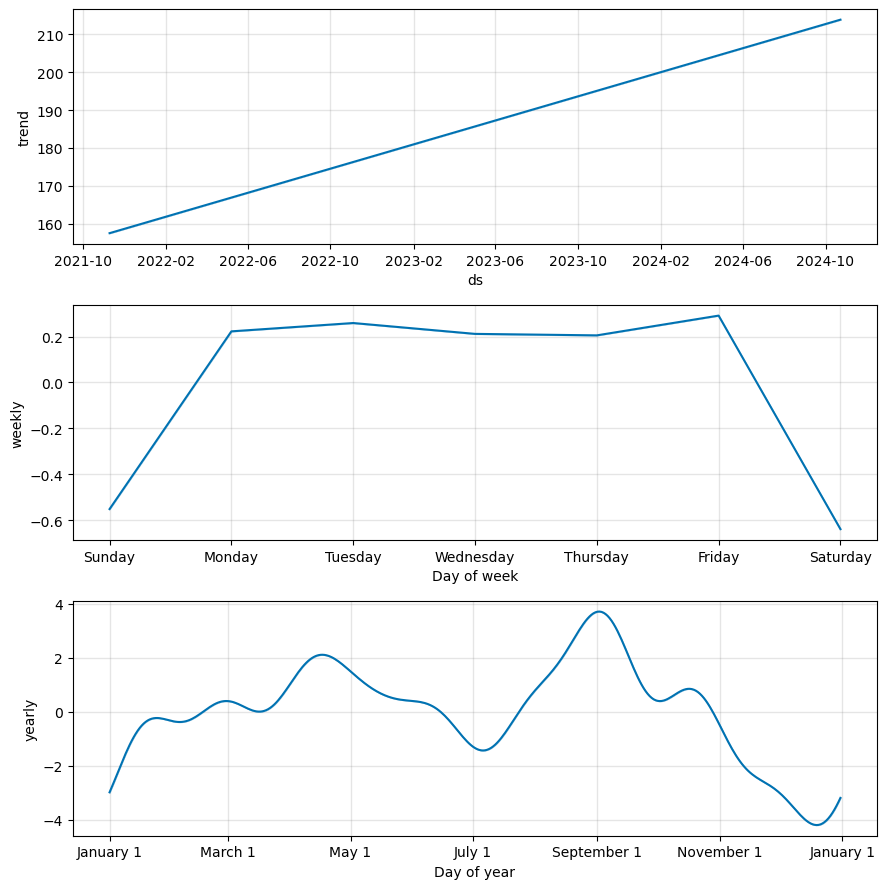

In [66]:
# Graficar componentes de Prophet
model_prophet.plot_components(forecast)
plt.show()


5. Comparación de resultados:
  - Compara las predicciones de la red LSTM con las predicciones de Prophet. Utiliza métricas como el RMSE (Root Mean Squared Error) o el MAE (Mean Absolute Error) para medir la precisión de ambos modelos.
  - Visualiza las predicciones de ambos modelos superpuestas a la serie temporal original para ver cuál se ajusta mejor a los datos.


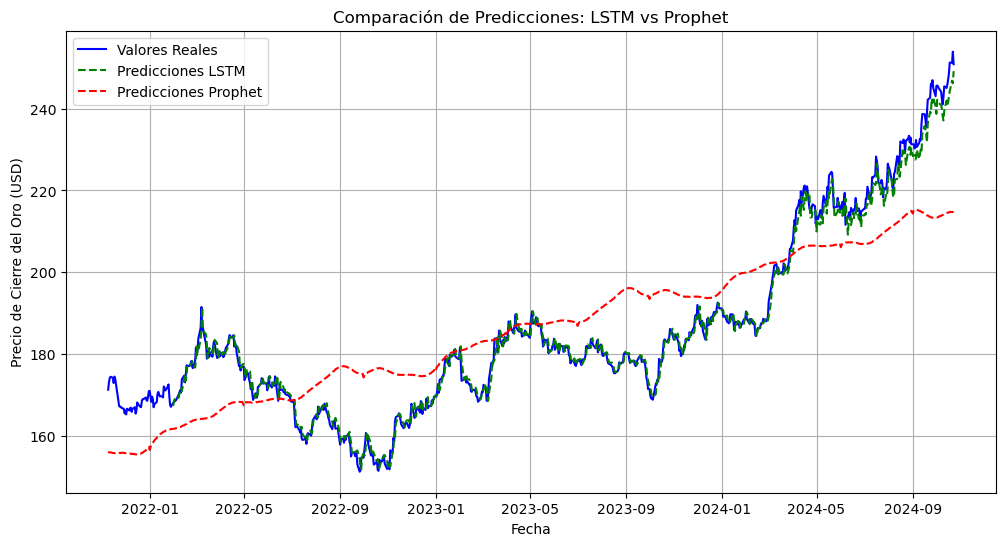

In [68]:
import matplotlib.pyplot as plt

# Graficar comparación entre LSTM y Prophet
plt.figure(figsize=(12, 6))
plt.plot(test_data["ds"], test_data["y"], label="Valores Reales", color="blue")
plt.plot(test_data["ds"][seq_length:], predictions, label="Predicciones LSTM", color="green", linestyle="--")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicciones Prophet", color="red", linestyle="--")
plt.title("Comparación de Predicciones: LSTM vs Prophet")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre del Oro (USD)")
plt.legend()
plt.grid()
plt.show()

In [69]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Calcular métricas para LSTM
mae_lstm = mean_absolute_error(test_data["y"][seq_length:], predictions)
rmse_lstm = root_mean_squared_error(test_data["y"][seq_length:], predictions)

# Calcular métricas para Prophet
mae_prophet = mean_absolute_error(test_data["y"], forecast["yhat"])
rmse_prophet = root_mean_squared_error(test_data["y"], forecast["yhat"])

print("Métricas para LSTM:")
print(f"Error Absoluto Medio (MAE): {mae_lstm:.2f}")
print(f"Error Cuadrático Medio (RMSE): {rmse_lstm:.2f}")

print("\nMétricas para Prophet:")
print(f"Error Absoluto Medio (MAE): {mae_prophet:.2f}")
print(f"Error Cuadrático Medio (RMSE): {rmse_prophet:.2f}")

Métricas para LSTM:
Error Absoluto Medio (MAE): 1.55
Error Cuadrático Medio (RMSE): 2.10

Métricas para Prophet:
Error Absoluto Medio (MAE): 11.23
Error Cuadrático Medio (RMSE): 13.20



6. Análisis y discusión:
  - Discute cuál de los modelos ofrece mejores resultados en este caso particular. ¿Por qué crees que Prophet o la red LSTM tuvieron un mejor rendimiento?
  - Reflexiona sobre las ventajas y desventajas de cada enfoque para la predicción de series temporales.